In [1]:
import json
import numpy as np
import os
import pandas as pd
import cv2
import tqdm
import pickle
import random
import sys
import re
import datetime as dt
import glob
import shutil
import collections
import operator
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
path_all_annotated_image = os.path.join('datasets','KBF','ANNOTATED_IMAGES')

In [4]:
PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

from UTILS.utils import from_vggbbox_get_vggpolygon, lists_remove_in1

you are on windows, so pycocotools can not be installed


In [5]:
#each time new images are annotated, copy all images from the folder (i.e. even the one which were not annotated) and put
#the annotation files in the annotations folder. We will here remove (put into no_regions fodler) all images which does not have
#one or more regions

# Download annotation info

In [6]:
df = pd.read_csv(os.path.join(path_all_annotated_image,'image_info.csv'), index_col=False, sep=';')
print(df.shape)
df.head(3)

(177, 8)


,filename,size,regions,file_attributes,annotations_name,nbr_regions,no_type,path
0,0.jpg,70631,"[{'shape_attributes': {'name': 'polygon', 'all...",{},via_region_data (14).json,2,False,datasets\KBF\ANNOTATED_IMAGES\0.jpg
1,1.jpg,65599,"[{'shape_attributes': {'name': 'polygon', 'all...",{},via_region_data (14).json,1,False,datasets\KBF\ANNOTATED_IMAGES\1.jpg
2,2.jpg,66715,"[{'shape_attributes': {'name': 'polygon', 'all...",{},via_region_data (14).json,1,False,datasets\KBF\ANNOTATED_IMAGES\2.jpg


In [7]:
df['img_aug'] = df['filename'].map(lambda x: 'augmented' in x)
df['img_aug'].value_counts(normalize=True)*100

False    100.0
Name: img_aug, dtype: float64

# Mean pixel value of images

In [8]:
li_img_path = df['path']
len(li_img_path)

177

In [9]:
li_r = []
li_g = []
li_b = []
for img_path in tqdm.tqdm(li_img_path):
    img = cv2.imread(img_path)
    b,g,r = cv2.split(img)          
    img = cv2.merge([r,g,b])
    li_r.append(np.mean([y for x in img[:,:,0] for y in x]))
    li_g.append(np.mean([y for x in img[:,:,1] for y in x]))
    li_b.append(np.mean([y for x in img[:,:,2] for y in x]))

100%|████████████████████████████████████████████████████████████████████████████████| 177/177 [02:14<00:00,  1.32it/s]


In [10]:
np.mean(li_r), np.mean(li_g), np.mean(li_b) #from dog: (124.48473297559339, 116.92511270309063, 102.7271572572251)

(75.06630365799587, 75.06630365799587, 75.06630365799587)

(80.45053541786082, 80.45053541786082, 80.45053541786082)

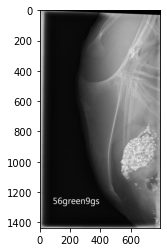

In [11]:
img = cv2.imread(li_img_path[0])
b,g,r = cv2.split(img)          
img = cv2.merge([r,g,b])
plt.imshow(img);
m_r = np.mean([y for x in img[:,:,0] for y in x])
m_g = np.mean([y for x in img[:,:,1] for y in x])
m_b = np.mean([y for x in img[:,:,2] for y in x])
m_r, m_g, m_b